# 1. Carregando os dados

In [1]:
# preprocessamento.py

# Instalação necessária (caso ainda não tenha)
# !pip install imbalanced-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

In [2]:
# Carregando o dataset
df = pd.read_csv('full_data.csv')

# 2. Análise Exploratória

In [3]:
# Verificando formato (linhas e colunas)
print("Dimensões do dataframe:", df.shape)

Dimensões do dataframe: (4981, 11)


In [4]:
# Exibindo informações gerais (tipo de dado, colunas, valores não-nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
# Descrição estatística dos dados
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
# Verificando a quantidade de NaN
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

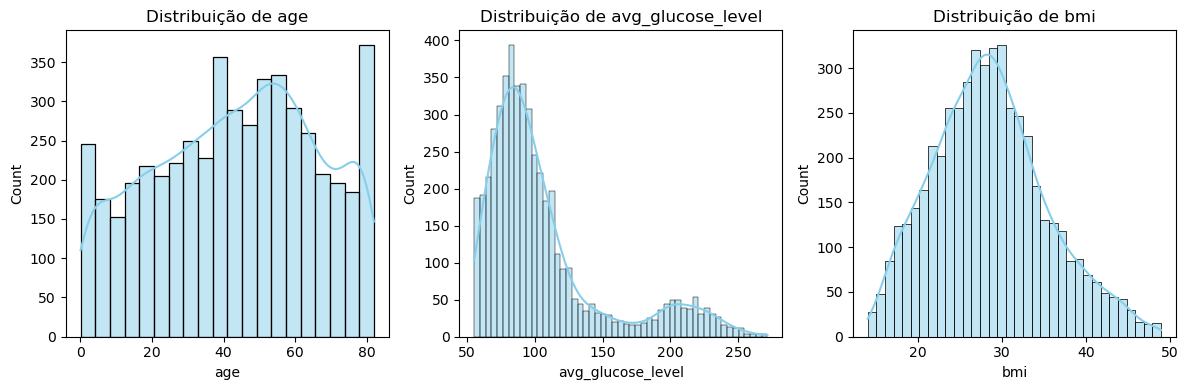

In [7]:
# Distribuição de frequência de algumas variáveis
num_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f"Distribuição de {col}")
plt.tight_layout()
plt.show()

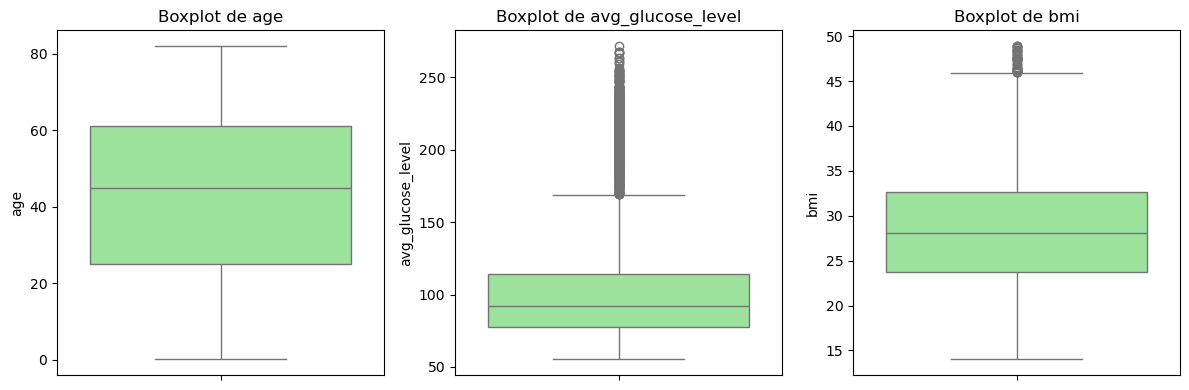

In [8]:
# Análise de Outliers
plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

C:\Users\Ruy\AppData\Local\Temp\ipykernel_2356\689652180.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Ruy\AppData\Local\Temp\ipykernel_2356\689652180.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Ruy\AppData\Local\Temp\ipykernel_2356\689652180.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Ruy\AppData\Local\Temp\ipykernel_2356\689652180.py:7: FutureWarning: 

Passing `palette` without assigning `h

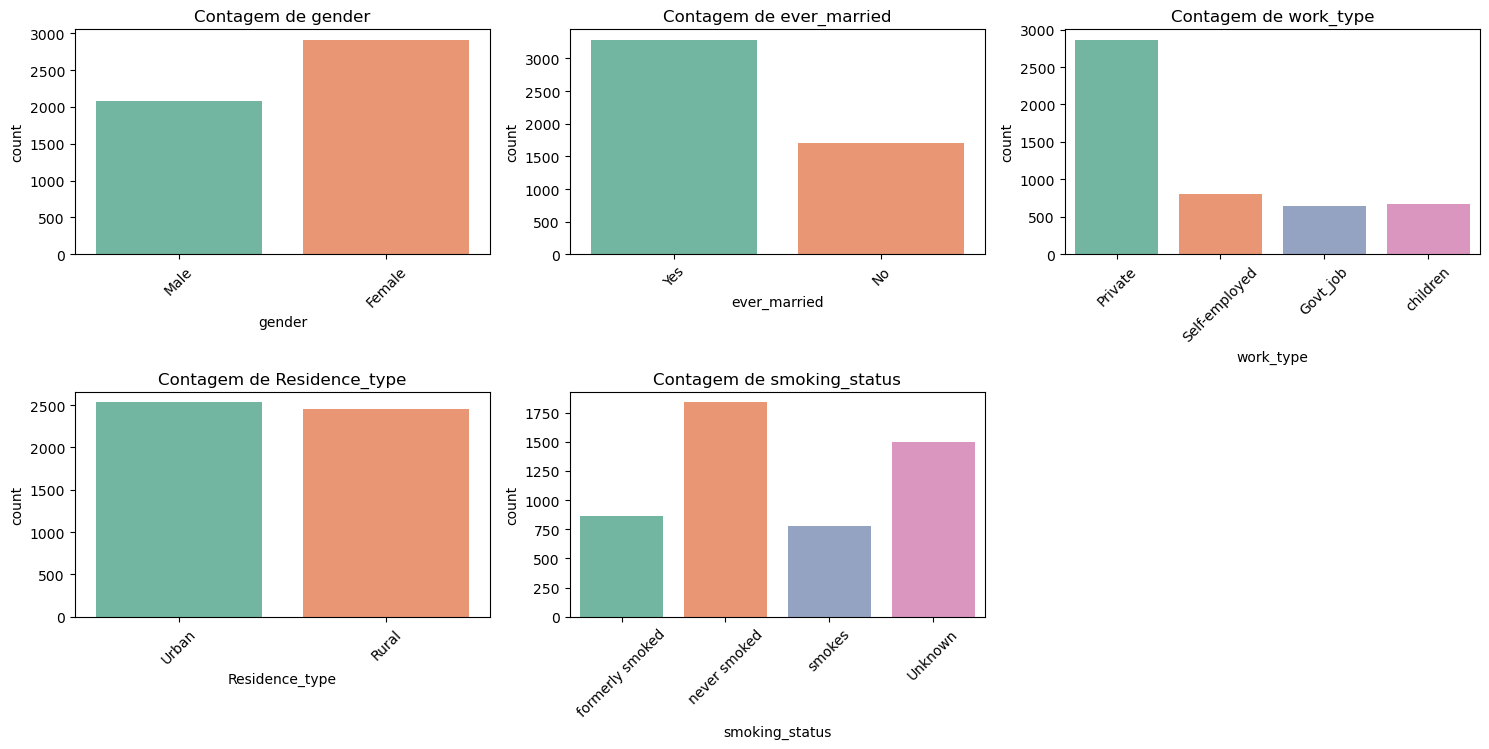

In [9]:
# Análise de desbalanceamento de classes
cat_cols = ['gender', 'ever_married','work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Contagem de {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

C:\Users\Ruy\AppData\Local\Temp\ipykernel_2356\3985602027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Ruy\AppData\Local\Temp\ipykernel_2356\3985602027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Ruy\AppData\Local\Temp\ipykernel_2356\3985602027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


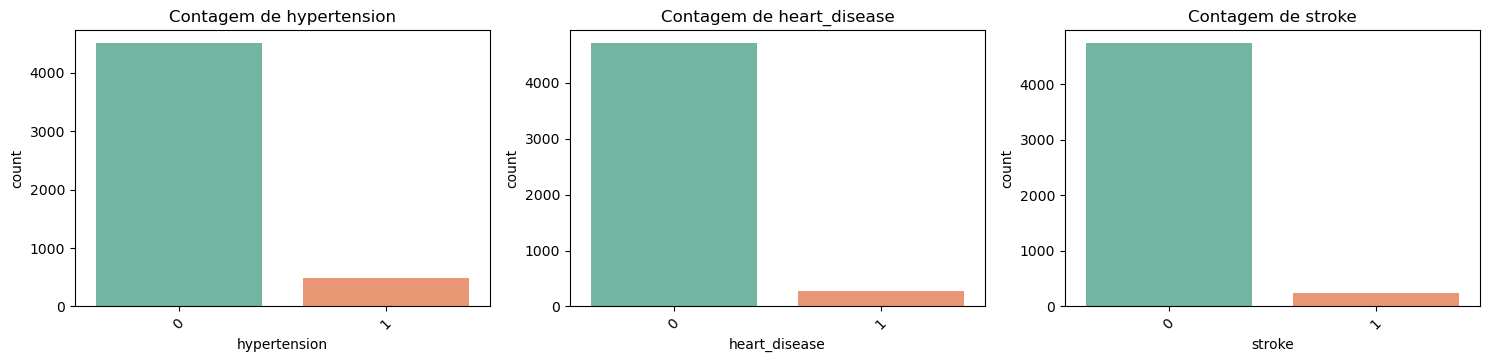

In [10]:
# Análise de desbalanceamento de classes
num_cols = [ 'hypertension','heart_disease', 'stroke']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Contagem de {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

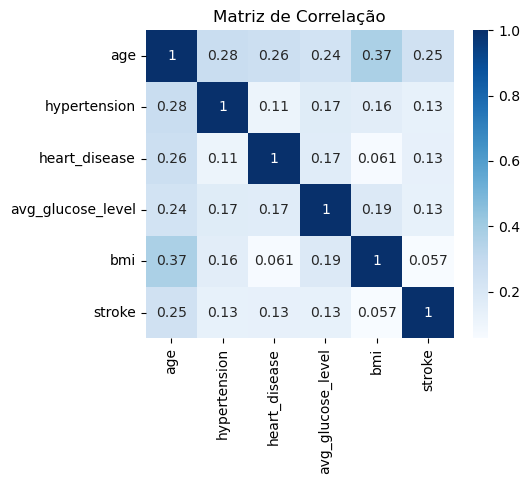

In [11]:
# Analisando correlação entre as variáveis
corr = df[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='Blues', square=True)
plt.title("Matriz de Correlação")
plt.show()

# 3. One-Hot-Encoding das variáveis categóricas

In [12]:
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [13]:
df = pd.get_dummies(df, columns=[col for col in df.columns if col in cat_cols]).astype(int)


# 4. Desbalanceamento de classes:
# Solução: Oversampling + Undersampling (ao mesmo tempo)
## - Oversampling (sobreamostragem) → Aumenta a quantidade de amostras da classe minoritária.
## - Undersampling (subamostragem) → Reduz a quantidade de amostras da classe majoritária.

In [14]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80,0,1,105,32,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49,0,0,171,34,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79,1,0,174,24,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81,0,0,186,29,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [15]:
# Removendo a coluna 'id' (não relevante para o modelo)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

In [16]:
# Separação de variáveis preditoras (X) e alvo (y)
X = df.drop('stroke', axis=1)  # Todas as colunas menos 'stroke'
y = df['stroke']               # Coluna alvo

In [17]:
y.value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

<Axes: ylabel='count'>

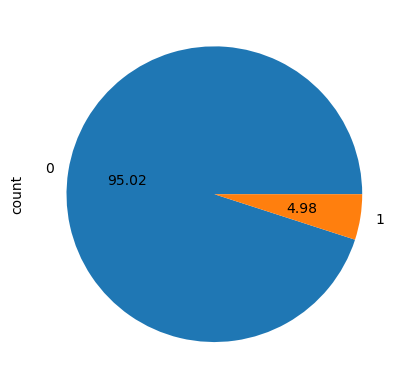

In [18]:
y.value_counts().plot.pie(autopct='%.2f')

In [19]:
# Aplicando o pipeline de balanceamento antes do split
under = RandomUnderSampler()  # Reduz classe majoritária
over = RandomOverSampler()    # Aumenta classe minoritária

pipeline = Pipeline(steps=[('o', over), ('u', under)])  # Primeiro Over, depois Under

# Aplicando o balanceamento no dataset completo antes do split
X, y = pipeline.fit_resample(X, y)

<Axes: ylabel='count'>

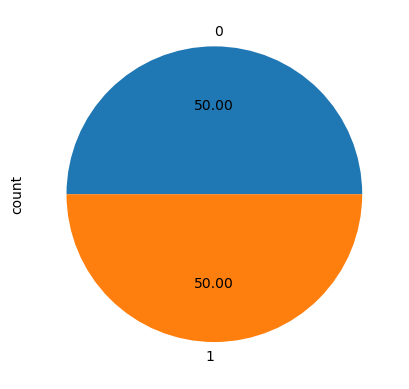

In [20]:
y.value_counts().plot.pie(autopct='%.2f')

In [21]:
y.value_counts()

stroke
0    4733
1    4733
Name: count, dtype: int64

In [23]:
# Reunindo os dados balanceados novamente em um dataframe
df_balanced = X.copy()
df_balanced['stroke'] = y

# Salvando na pasta Data
df_balanced.to_csv("Stroke.csv", index=False)
print("Dados tratados e salvos em Data/Stroke.csv")

Dados tratados e salvos em Data/Stroke.csv
